In [1]:
N = ord("O") % 3 + 1
print(N)

2


Загальні втрати танків: 4620
4 найбільших добових втрат танків: [35 44 48 66]
Втрати танків навесні 2023 року: 407
Середнє значення втрат танків (100 днів війни): 801.82


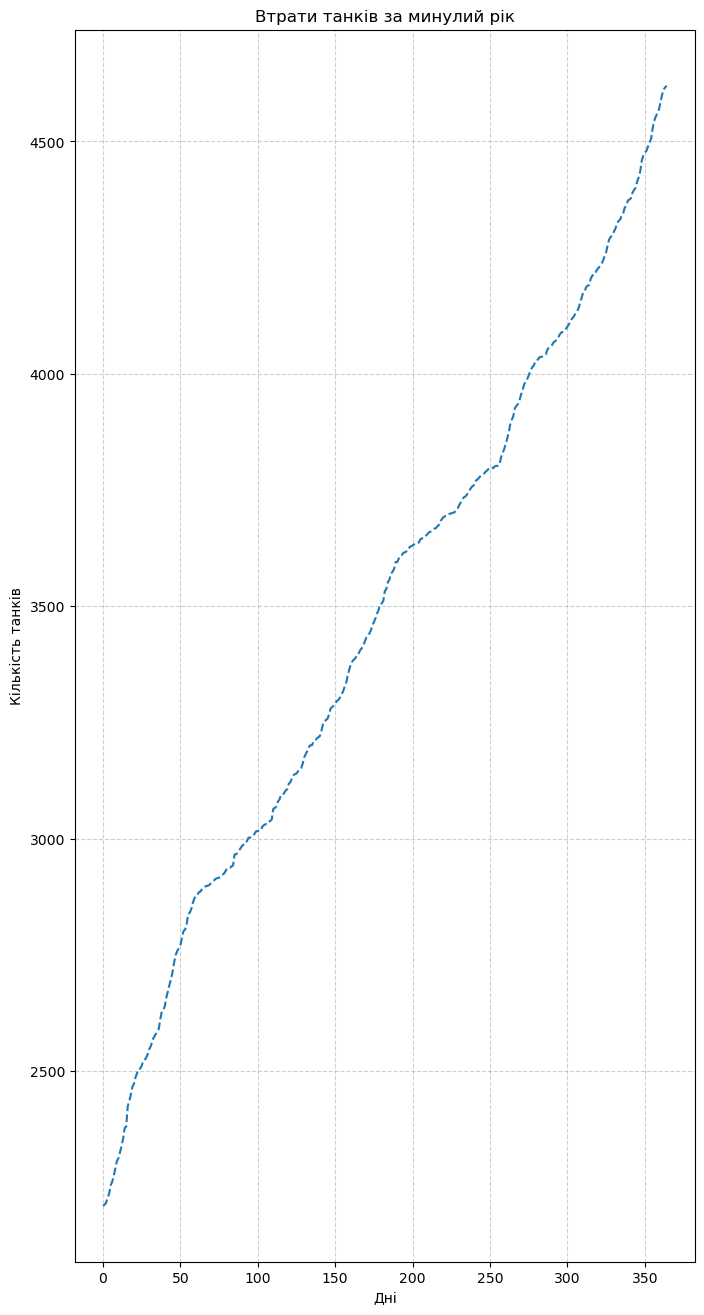

In [4]:
#Ці рядки імпортують бібліотеки
import numpy as np
import csv
import matplotlib.pyplot as plt

#Ця функція отримує дані з конкретного стовпця CSV-файлу. Вона приймає ім'я файлу, ім'я стовпця та необов'язковий тип даних і повертає масив NumPy з вибраними даними.
def get_column_data(file_name, column_name, data_type=int):
    with open(file_name, newline='') as csvfile:
        reader = csv.DictReader(csvfile)
        data = [row[column_name] for row in reader]
    return np.array(data, dtype=data_type)

#Це встановлює ім'я файлу та отримує дані зі стовпця 'tank' з CSV-файлу за допомогою функції get_column_data.
file_name = 'russia_losses_equipment.csv'
tank_data = get_column_data(file_name, 'tank')

#Ця функція обчислює щоденні втрати, взявши різницю між послідовними елементами масиву 'tank' за допомогою np.diff().
def get_daily_losses():
    return np.diff(tank_data)
#Ця функція обчислює топ-4 щоденних втрат, сортуючи щоденні втрати за зростанням і вибираючи останні 4 елементи.
def get_top_4_daily_losses():
    return np.sort(get_daily_losses())[-4:]

#Ця функція обчислює втрати в танках весною 2023 року, знаходячи індекси відповідних дат та віднімаючи відповідні значення 'tank'.
def get_spring_losses():
    dates_data = get_column_data(file_name, 'date', data_type=str)
    start_date = '2023-03-01'
    end_date = '2023-05-31'
    spring_start_index = np.where(dates_data == start_date)[0][0]
    spring_end_index = np.where(dates_data == end_date)[0][0]

    return tank_data[spring_end_index] - tank_data[spring_start_index]  # Corrected variable name

#Ця функція обчислює середні втрати за перші 100 днів війни.
def get_average_losses_100():
    return np.mean(tank_data[:100])  # Corrected index to get the first 100 days

#Ця функція побудовує графік втрат за останній рік, встановлює підписи, заголовок, сітку та зберігає графік у вигляді зображення.
def show_last_year_losses():
    last_year_losses = tank_data[-365:]  # Corrected index to get the last 365 days
    dates = np.arange(len(last_year_losses))
    total_losses = tank_data[-1]

    plt.plot(dates, last_year_losses, linestyle='--', label='Втрати танків')
    plt.xlabel('Дні')
    plt.ylabel('Кількість танків')
    plt.title('Втрати танків за минулий рік')
    plt.grid(True, linestyle='--', alpha=0.6)

    plt.gcf().set_size_inches(8, 16)
    plt.gcf().set_dpi(100)

    plt.savefig('last_year_losses.png', dpi=100)
    plt.show()

print("Загальні втрати танків:", tank_data[-1])  # Corrected variable name
print("4 найбільших добових втрат танків:", get_top_4_daily_losses())
print("Втрати танків навесні 2023 року:", get_spring_losses())
print("Середнє значення втрат танків (100 днів війни):", get_average_losses_100())

show_last_year_losses()